In [1]:
from forecasting_models.multivariate_models.arimax.model import ARIMAXForecastModel

arimax = ARIMAXForecastModel("./examples/configs/arimax/arimax_config.yaml")

In [2]:
arimax.train()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3225
Model:               SARIMAX(4, 1, 1)   Log Likelihood               -1817.280
Date:                Mon, 29 Apr 2024   AIC                           3648.560
Time:                        10:06:59   BIC                           3691.109
Sample:                    11-20-2023   HQIC                          3663.809
                         - 12-01-2023                                         
Covariance Type:                  opg                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
mem_usage_percentage     7.4443      0.538     13.848      0.000       6.391       8.498
ar.L1                    0.7580      0.013     58.895      0.000       0.733       0.783
ar.L2                    0.0790      0.016      4.811      0.000       0.047       0.111
ar.L3                   -0.0225      0.018     -1.229      0.219      -0.058       0.013
ar.L4                    0.0890      0.015      5.876      0.000       0.059       0.119
ma.L1                   -0.9792      0.006   -156.471      0.000      -0.991      -0.967
sigma2                   0.1807      0.002     81.814      0.000       0.176       0.185
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7753.76
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                             0.80
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [3]:
from data_utils.csv_utils import read_timeseries_csv

test_df = read_timeseries_csv("./examples/sample_data/multivar_data/multivar_example_5m_TEST.csv")

In [4]:
arimax.predict(test_df[arimax.config.variable_selection.exogenous_variables][:arimax.config.forecasting_parameters.forecast_horizon_size])

2023-12-01 04:45:22    3.127752
2023-12-01 04:50:22    3.132256
2023-12-01 04:55:22    3.099342
2023-12-01 05:00:22    3.155652
2023-12-01 05:05:22    3.141721
2023-12-01 05:10:22    3.233417
2023-12-01 05:15:22    3.160105
2023-12-01 05:20:22    3.202267
2023-12-01 05:25:22    3.129258
2023-12-01 05:30:22    3.130609
2023-12-01 05:35:22    3.269224
2023-12-01 05:40:22    3.191643
2023-12-01 05:45:22    3.233188
2023-12-01 05:50:22    3.269667
2023-12-01 05:55:22    3.124981
2023-12-01 06:00:22    3.240757
2023-12-01 06:05:22    3.271564
2023-12-01 06:10:22    3.293269
2023-12-01 06:15:22    3.190135
2023-12-01 06:20:22    3.191437
2023-12-01 06:25:22    3.211654
2023-12-01 06:30:22    3.226221
2023-12-01 06:35:22    3.247291
2023-12-01 06:40:22    3.257740
Freq: 5min, dtype: float64

In [5]:
arimax.evaluate_prediction(
    test_df["cpu_usage_percentage"][:arimax.config.forecasting_parameters.forecast_horizon_size],
    method="r2",
)

(-1.1595080745385102,
                        actual  predicted      diff
 2023-12-01 04:45:22  3.113010   3.127752 -0.014742
 2023-12-01 04:50:22  3.004385   3.132256 -0.127871
 2023-12-01 04:55:22  3.075376   3.099342 -0.023966
 2023-12-01 05:00:22  3.015011   3.155652 -0.140642
 2023-12-01 05:05:22  3.048212   3.141721 -0.093508
 2023-12-01 05:10:22  2.673476   3.233417 -0.559942
 2023-12-01 05:15:22  3.545206   3.160105  0.385101
 2023-12-01 05:20:22  3.735257   3.202267  0.532990
 2023-12-01 05:25:22  3.307455   3.129258  0.178198
 2023-12-01 05:30:22  3.271119   3.130609  0.140510
 2023-12-01 05:35:22  2.790855   3.269224 -0.478369
 2023-12-01 05:40:22  2.693728   3.191643 -0.497915
 2023-12-01 05:45:22  2.574162   3.233188 -0.659026
 2023-12-01 05:50:22  2.803200   3.269667 -0.466467
 2023-12-01 05:55:22  2.671247   3.124981 -0.453734
 2023-12-01 06:00:22  2.616788   3.240757 -0.623969
 2023-12-01 06:05:22  2.530648   3.271564 -0.740915
 2023-12-01 06:10:22  2.819222   3.293269 

In [6]:
actuals, predictions = arimax.test(test_df)

In [7]:
arimax.evaluate_test(
    actuals,
    predictions,
    method="r2",
)

(0.8266585552793435,
                        actual  predicted      diff
 2023-12-01 04:50:22  3.113010   3.127752 -0.014742
 2023-12-01 04:55:22  3.004385   3.132256 -0.127871
 2023-12-01 05:00:22  3.075376   3.099342 -0.023966
 2023-12-01 05:05:22  3.015011   3.155652 -0.140642
 2023-12-01 05:10:22  3.048212   3.141721 -0.093508
 ...                       ...        ...       ...
 2023-12-03 22:25:22  0.433224   0.304402  0.128822
 2023-12-03 22:30:22  0.265694   0.353427 -0.087733
 2023-12-03 22:35:22  0.403594   0.480556 -0.076962
 2023-12-03 22:40:22  0.301115   0.351127 -0.050013
 2023-12-03 22:45:22  0.318140   0.508847 -0.190707
 
 [792 rows x 3 columns])

In [8]:
anomaly_df = arimax.flag_anomalies(actuals, predictions, 5)

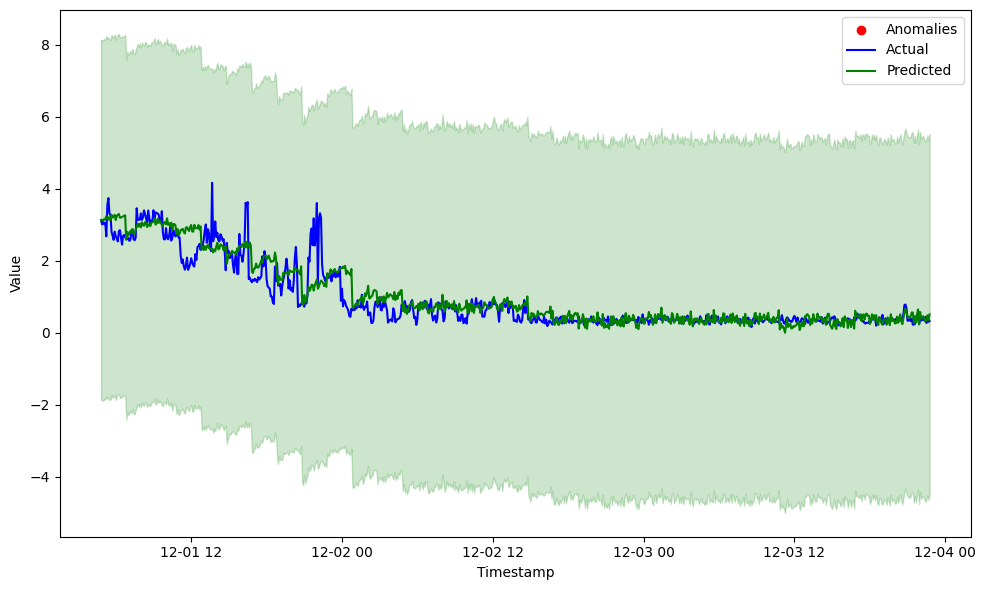

In [9]:
from forecasting_models.general_plotter import GeneralPlotter

GeneralPlotter.plot_anomalies(
    anomaly_df,
    5,
)

In [10]:
anomaly_df = arimax.flag_anomalies_adaptive(
    actuals,
    predictions,
    4.0,
    arimax.config.forecasting_parameters.forecast_horizon_size,
)

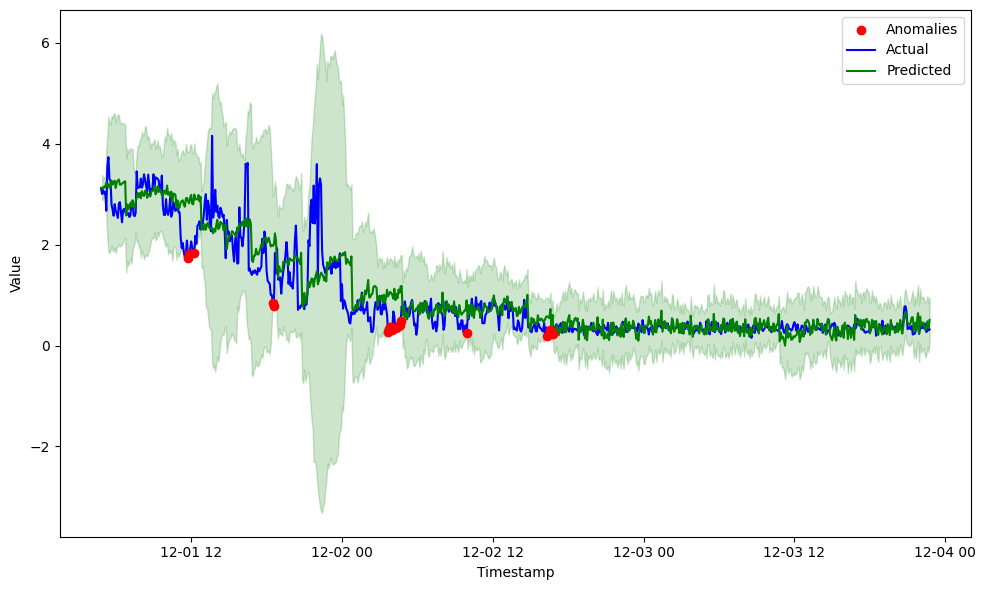

In [11]:
GeneralPlotter.plot_anomalies_adaptive(
    anomaly_df,
)